In [1]:
# Install required packages in the notebook environment (use magic so it runs in the kernel)
%pip install pandas seaborn matplotlib

import pandas as pd

# import numpy as np    # ← commented out / removed if not used
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load the dataset
df = pd.read_csv(
    r"C:\Users\nobody\OneDrive\Desktop\VSCODE 25\SUD\SUD repo\ELO2_Asclepios_Ai\1_datasets\raw\teds_ml_ready.csv",
    comment="#",
    on_bad_lines="skip",
)

print("=" * 80)
print("TEDS DATASET EXPLORATION")
print("=" * 80)

C:\Users\nobody\AppData\Local\Temp\ipykernel_9932\628861857.py:2: DtypeWarning: Columns (5,13,17,23,24,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


TEDS DATASET EXPLORATION


In [3]:
print("\n" + "=" * 80)
print("1. DATASET OVERVIEW")
print("=" * 80)

print("\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\nColumns:\n{df.columns.tolist()}")

# Missing data summary
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_summary = (
    pd.DataFrame({"Missing_Count": missing, "Percentage": missing_pct})
    .query("Missing_Count > 0")
    .sort_values("Percentage", ascending=False)
)

if not missing_summary.empty:
    print("\nMissing Data Summary:\n{missing_summary}")
else:
    print("\nNo missing values detected.")

# Data types
print("\nData Types Distribution:")
print(df.dtypes.value_counts())


1. DATASET OVERVIEW

Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns

Columns:
{df.columns.tolist()}

Missing Data Summary:
{missing_summary}

Data Types Distribution:
object     30
int64      18
float64     2
Name: count, dtype: int64



2. POPULATION DEMOGRAPHICS

{col.replace('_', ' ').title()}:
age_group
30-34    282927
35-39    262348
40-44    214270
25-29    197042
55-64    189852
45-49    145069
50-54    129183
21-24     89953
65+       41092
18-20     34587
15-17     29956
12-14      9554
Name: count, dtype: int64

{col.replace('_', ' ').title()}:
sex
Male      1060317
Female     564289
Name: count, dtype: int64

{col.replace('_', ' ').title()}:
race
White                                     974253
Black/African American                    301793
Other single race                         115229
American Indian                            64225
Two or more races                          36124
Asian                                      11707
Native Hawaiian/Other Pacific Islander      5913
Alaska Native                               2333
Asian/Pacific Islander                       174
Name: count, dtype: int64

{col.replace('_', ' ').title()}:
ethnicity
Not Hispanic/Latino      1223730
Hispanic, unspecified      

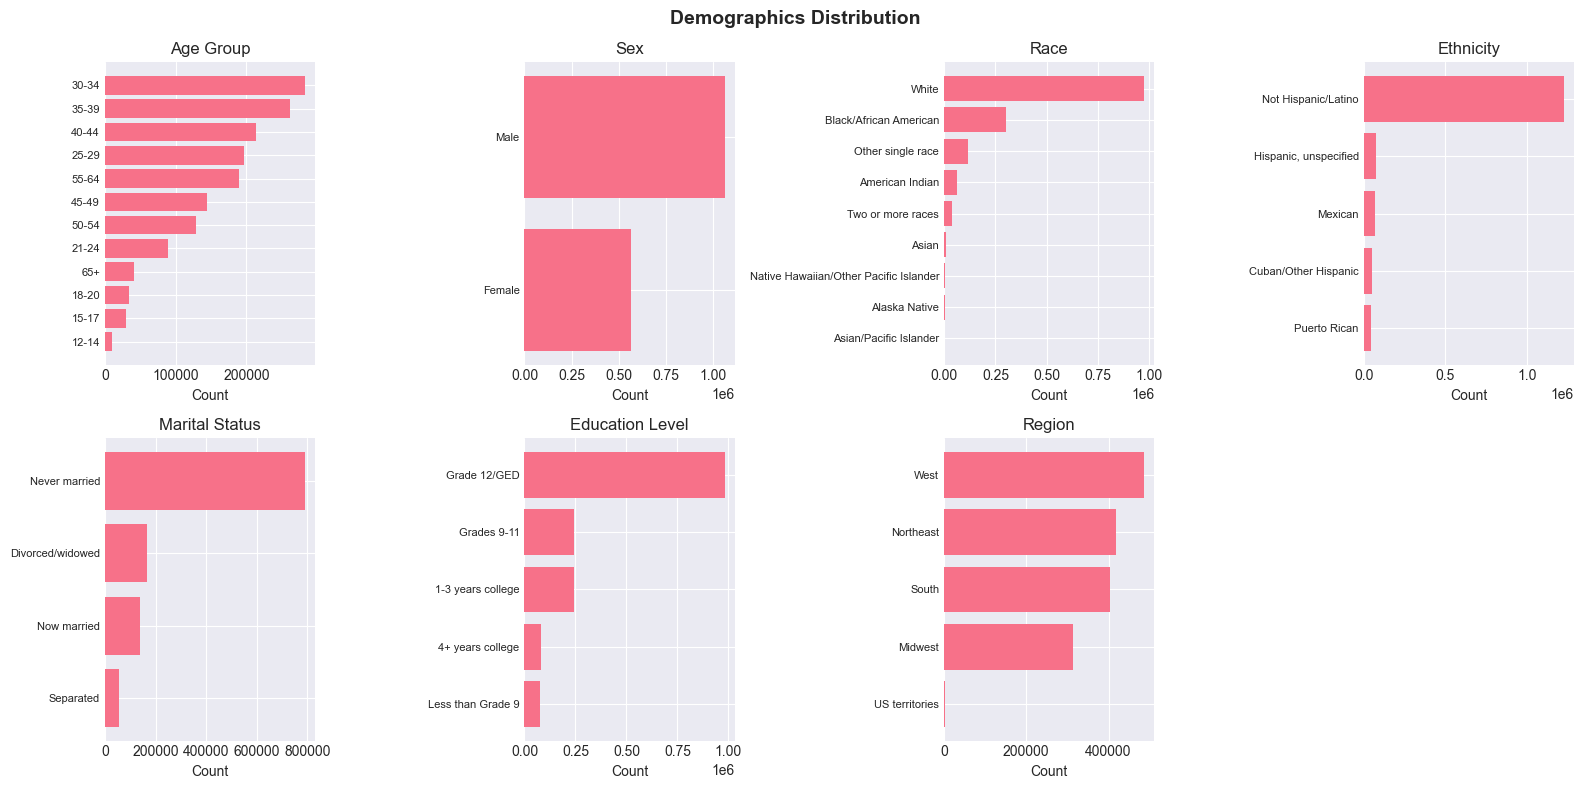

In [4]:
# 2. POPULATION DEMOGRAPHICS

print("\n" + "=" * 80)
print("2. POPULATION DEMOGRAPHICS")
print("=" * 80)

demographic_cols = [
    "age_group",
    "sex",
    "race",
    "ethnicity",
    "marital_status",
    "education_level",
    "region",
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(demographic_cols):
    if col in df.columns:
        value_counts = df[col].value_counts()
        print("\n{col.replace('_', ' ').title()}:")
        print(value_counts)

        axes[idx].barh(range(len(value_counts)), value_counts.values)
        axes[idx].set_yticks(range(len(value_counts)))
        axes[idx].set_yticklabels(value_counts.index, fontsize=8)
        axes[idx].set_xlabel("Count")
        axes[idx].set_title(col.replace("_", " ").title())
        axes[idx].invert_yaxis()

# Remove empty subplot
fig.delaxes(axes[-1])
plt.suptitle("Demographics Distribution", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


3. SUBSTANCE USE PATTERNS

Primary Substance Distribution:
primary_substance
Alcohol                      474586
Methamphetamine/speed        188620
Heroin                       177111
Other opiates/synthetics     174679
Marijuana/hashish            123350
Cocaine/crack                 89763
Benzodiazepines               11095
Other amphetamines            10115
Other drugs                    8150
Other stimulants               3140
PCP                            2914
Hallucinogens                  2083
Other sedatives/hypnotics      1499
Non-Rx methadone               1229
Inhalants                       743
Barbiturates                    720
OTC medications                 476
Other tranquilizers             142
Name: count, dtype: int64

Proportion:
{(primary_sub / len(df) * 100).round(2)}

Substance Category Distribution:
substance_category
Alcohol       474586
Opioids       353019
Stimulants    291638
Cannabis      123350
Other          14366
Sedatives      13456
Name: count, dt

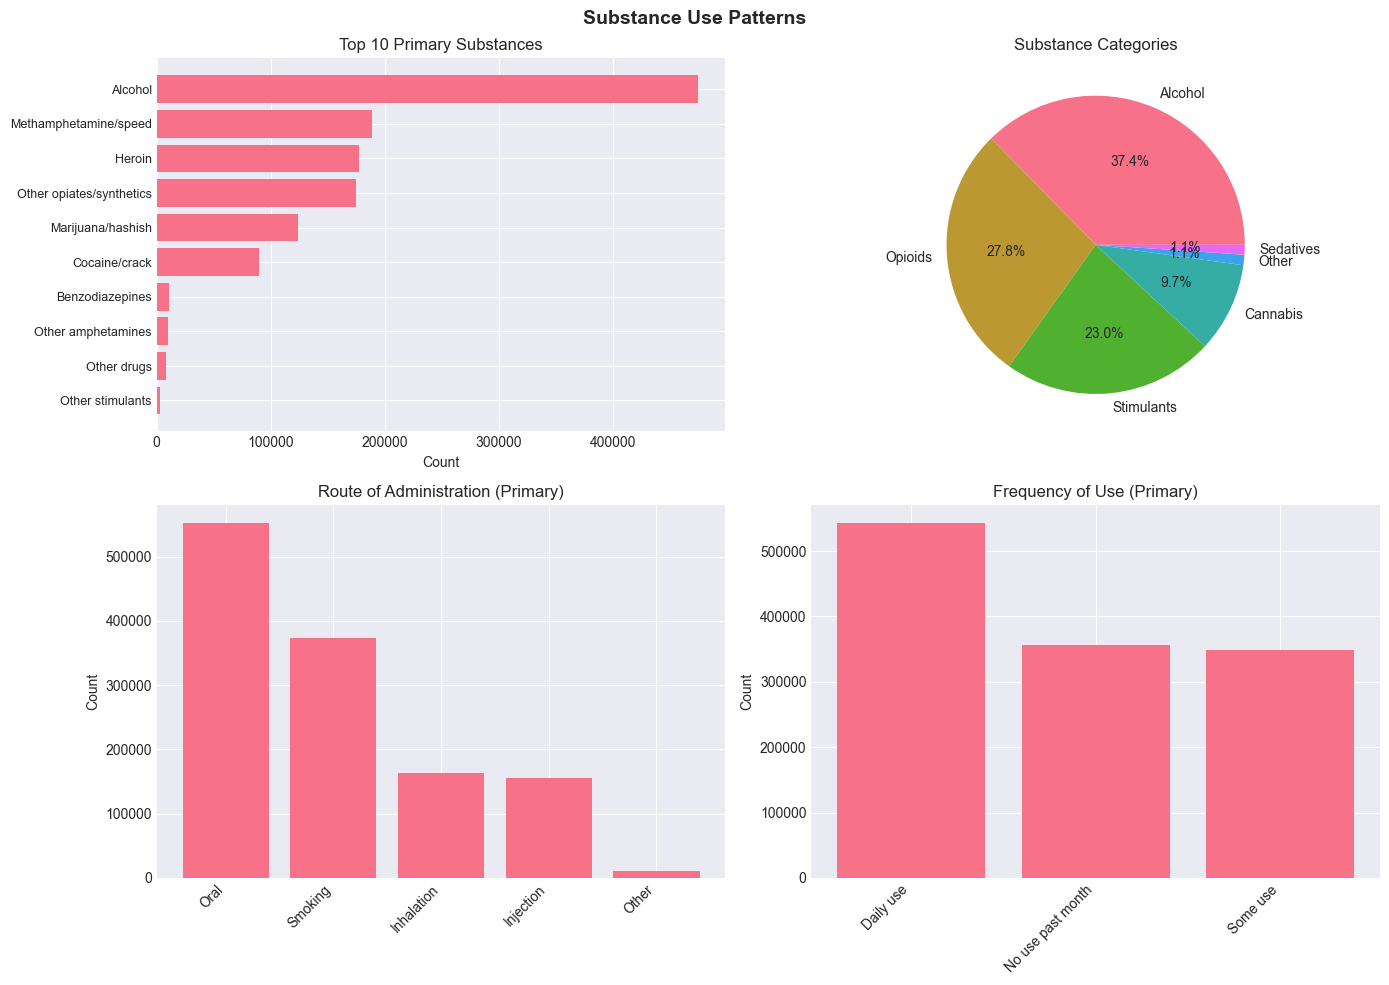

In [5]:
# 3. SUBSTANCE USE PATTERNS

print("\n" + "=" * 80)
print("3. SUBSTANCE USE PATTERNS")
print("=" * 80)

# Primary substance analysis
if "primary_substance" in df.columns:
    print("\nPrimary Substance Distribution:")
    primary_sub = df["primary_substance"].value_counts()
    print(primary_sub)
    print("\nProportion:\n{(primary_sub / len(df) * 100).round(2)}")

# Substance category
if "substance_category" in df.columns:
    print("\nSubstance Category Distribution:")
    cat_dist = df["substance_category"].value_counts()
    print(cat_dist)
    print("\nProportion:\n{(cat_dist / len(df) * 100).round(2)}")

# Polysubstance use
binary_substance_features = [
    "is_polysubstance",
    "is_opioid_primary",
    "is_stimulant_primary",
    "is_injection_user",
]
print("\nSubstance Use Indicators:")
for col in binary_substance_features:
    if col in df.columns:
        count = df[col].sum()
        pct = (count / len(df) * 100).round(2)
        print("{col.replace('_', ' ').title()}: {count} ({pct}%)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top substances
if "primary_substance" in df.columns:
    top_substances = df["primary_substance"].value_counts().head(10)
    axes[0, 0].barh(range(len(top_substances)), top_substances.values)
    axes[0, 0].set_yticks(range(len(top_substances)))
    axes[0, 0].set_yticklabels(top_substances.index, fontsize=9)
    axes[0, 0].set_xlabel("Count")
    axes[0, 0].set_title("Top 10 Primary Substances")
    axes[0, 0].invert_yaxis()

# Substance category pie
if "substance_category" in df.columns:
    cat_counts = df["substance_category"].value_counts()
    axes[0, 1].pie(cat_counts.values, labels=cat_counts.index, autopct="%1.1f%%")
    axes[0, 1].set_title("Substance Categories")

# Route and frequency for primary substance
if "route_primary" in df.columns:
    route = df["route_primary"].value_counts()
    axes[1, 0].bar(range(len(route)), route.values)
    axes[1, 0].set_xticks(range(len(route)))
    axes[1, 0].set_xticklabels(route.index, rotation=45, ha="right")
    axes[1, 0].set_ylabel("Count")
    axes[1, 0].set_title("Route of Administration (Primary)")

if "frequency_primary" in df.columns:
    freq = df["frequency_primary"].value_counts()
    axes[1, 1].bar(range(len(freq)), freq.values)
    axes[1, 1].set_xticks(range(len(freq)))
    axes[1, 1].set_xticklabels(freq.index, rotation=45, ha="right")
    axes[1, 1].set_ylabel("Count")
    axes[1, 1].set_title("Frequency of Use (Primary)")

plt.suptitle("Substance Use Patterns", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


4. TREATMENT HISTORY & RISK FACTORS

Prior Treatment Episodes:
prior_treatments
Five or more prior    285287
Four prior             83811
No prior              646928
One prior             288604
Three prior           123995
Two prior             197208
Name: count, dtype: int64

Risk Factor Prevalence:
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)
{col.replace('_', ' ').title()}: {count} ({pct}%)


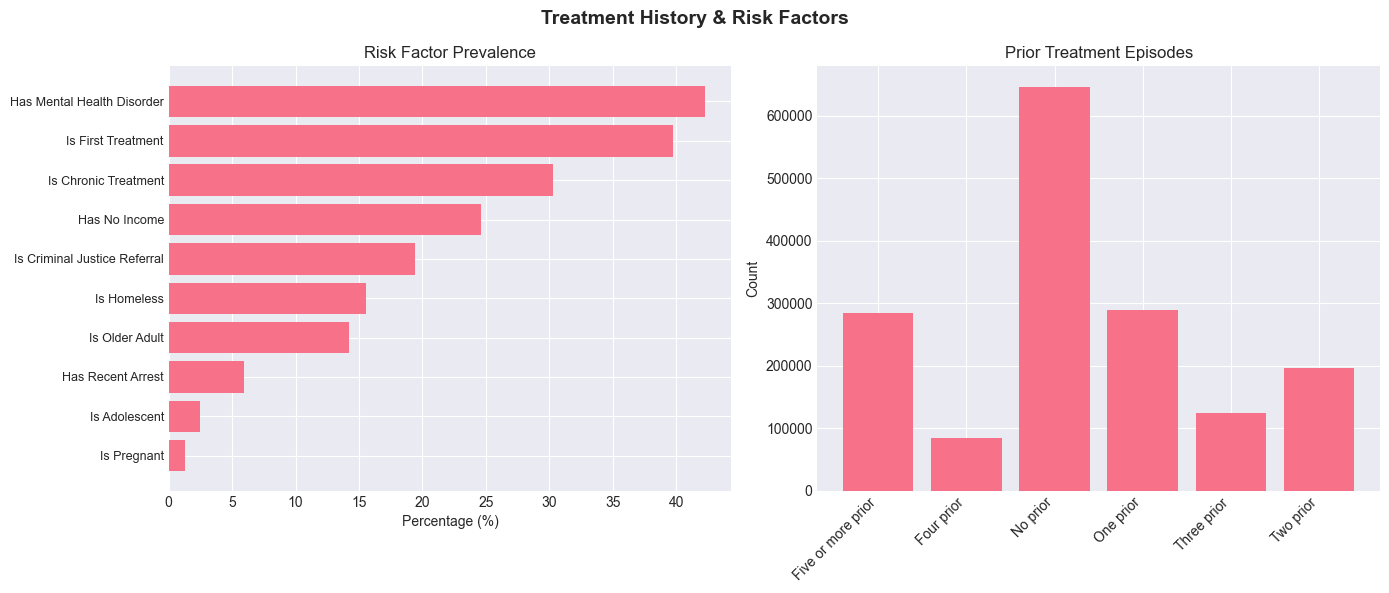

In [6]:
# 4. TREATMENT HISTORY & RISK FACTORS

print("\n" + "=" * 80)
print("4. TREATMENT HISTORY & RISK FACTORS")
print("=" * 80)

# Prior treatments
if "prior_treatments" in df.columns:
    print("\nPrior Treatment Episodes:")
    prior = df["prior_treatments"].value_counts().sort_index()
    print(prior)

# Risk factor prevalence
risk_factors = [
    "has_mental_health_disorder",
    "is_chronic_treatment",
    "is_first_treatment",
    "has_recent_arrest",
    "is_criminal_justice_referral",
    "is_homeless",
    "has_no_income",
    "is_pregnant",
    "is_adolescent",
    "is_older_adult",
]

print("\nRisk Factor Prevalence:")
risk_summary = []
for col in risk_factors:
    if col in df.columns:
        count = df[col].sum()
        pct = (count / len(df) * 100).round(2)
        risk_summary.append(
            {"Factor": col.replace("_", " ").title(), "Count": count, "Percentage": pct}
        )
        print("{col.replace('_', ' ').title()}: {count} ({pct}%)")

risk_df = pd.DataFrame(risk_summary).sort_values("Percentage", ascending=False)

# Visualize risk factors
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Risk factor prevalence
if not risk_df.empty:
    axes[0].barh(range(len(risk_df)), risk_df["Percentage"].values)
    axes[0].set_yticks(range(len(risk_df)))
    axes[0].set_yticklabels(risk_df["Factor"], fontsize=9)
    axes[0].set_xlabel("Percentage (%)")
    axes[0].set_title("Risk Factor Prevalence")
    axes[0].invert_yaxis()

# Prior treatments distribution
if "prior_treatments" in df.columns:
    prior_counts = df["prior_treatments"].value_counts().sort_index()
    axes[1].bar(range(len(prior_counts)), prior_counts.values)
    axes[1].set_xticks(range(len(prior_counts)))
    axes[1].set_xticklabels(prior_counts.index, rotation=45, ha="right")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Prior Treatment Episodes")

plt.suptitle("Treatment History & Risk Factors", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


5. SERVICE TYPES & ACCESS

Service Type Distribution:
service_type
Non-intensive Outpatient       828477
Detox 24hr Residential         222797
Intensive Outpatient           196094
Rehab Short-term (≤30 days)    186278
Rehab Long-term (>30 days)     122578
Detox 24hr Hospital             33277
Outpatient Detox                24789
Rehab Hospital                  11543
Name: count, dtype: int64

Proportion:
{(services / len(df) * 100).round(2)}

Wait Time Distribution:
wait_time_days
1-7 days       127505
15-30 days      25702
31+ days        19422
8-14 days       31891
Same day      1421313
Name: count, dtype: int64

Referral Source Distribution:
referral_source
Self/Individual             642483
Criminal justice/DUI/DWI    315967
Alcohol/drug provider       117006
Other community             107634
Other healthcare             92868
Employer/EAP                  9595
School                        6248
Name: count, dtype: int64

Payment Source Distribution:
payment_source
Medicaid    

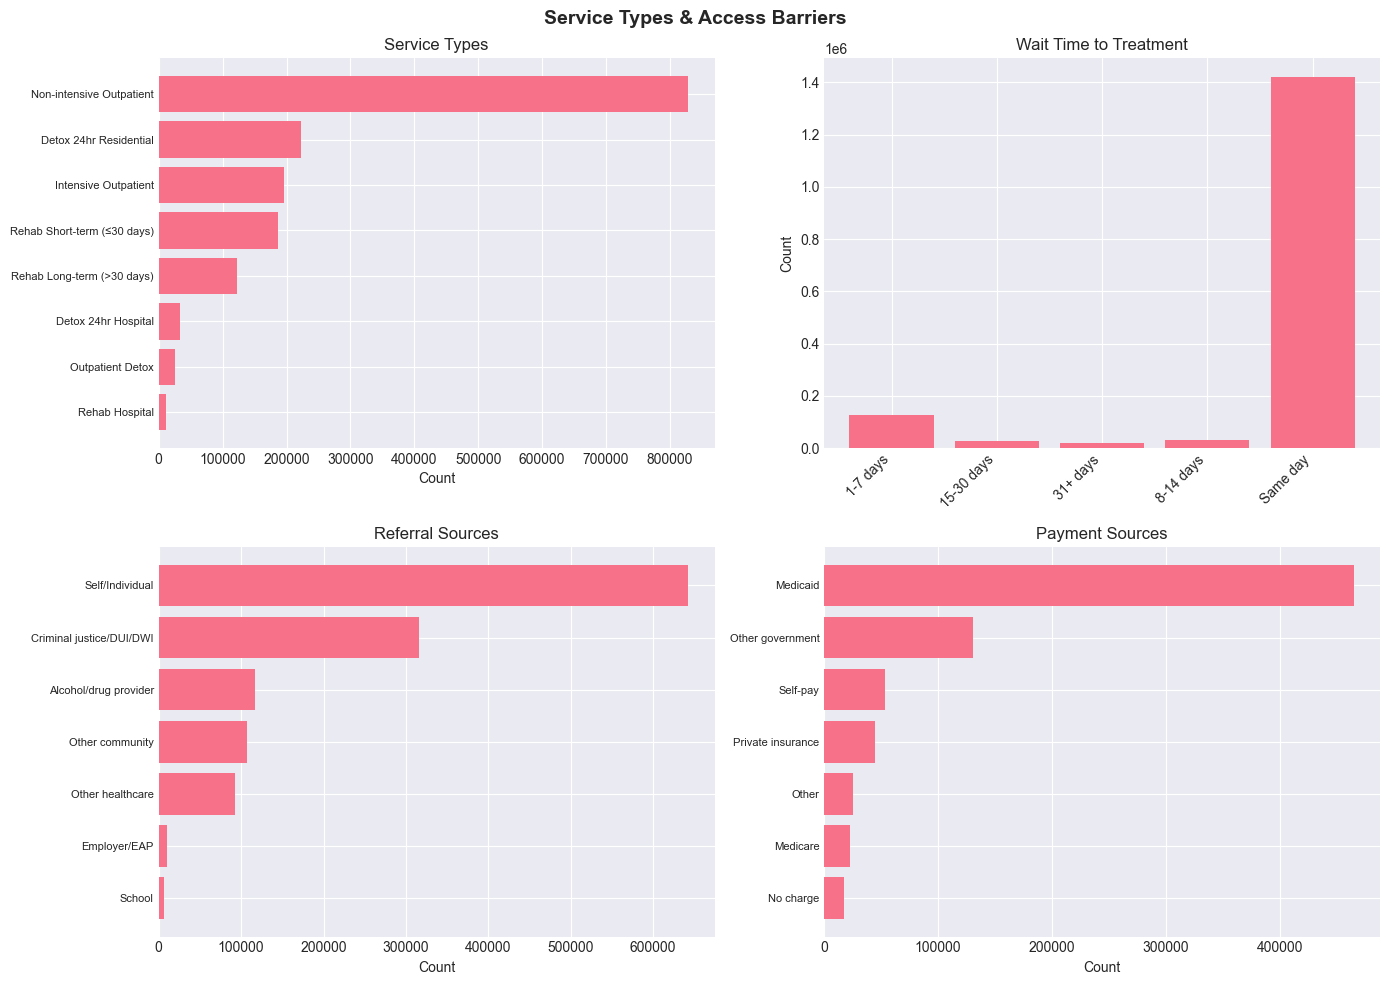

In [7]:
# 5. SERVICE TYPES & ACCESS

print("\n" + "=" * 80)
print("5. SERVICE TYPES & ACCESS")
print("=" * 80)

# Service type distribution
if "service_type" in df.columns:
    print("\nService Type Distribution:")
    services = df["service_type"].value_counts()
    print(services)
    print("\nProportion:\n{(services / len(df) * 100).round(2)}")

# Wait times
if "wait_time_days" in df.columns:
    print("\nWait Time Distribution:")
    wait = df["wait_time_days"].value_counts().sort_index()
    print(wait)

# Referral sources
if "referral_source" in df.columns:
    print("\nReferral Source Distribution:")
    referral = df["referral_source"].value_counts()
    print(referral)

# Payment sources
if "payment_source" in df.columns:
    print("\nPayment Source Distribution:")
    payment = df["payment_source"].value_counts()
    print(payment)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Service types
if "service_type" in df.columns:
    services = df["service_type"].value_counts()
    axes[0, 0].barh(range(len(services)), services.values)
    axes[0, 0].set_yticks(range(len(services)))
    axes[0, 0].set_yticklabels(services.index, fontsize=8)
    axes[0, 0].set_xlabel("Count")
    axes[0, 0].set_title("Service Types")
    axes[0, 0].invert_yaxis()

# Wait times
if "wait_time_days" in df.columns:
    wait = df["wait_time_days"].value_counts().sort_index()
    axes[0, 1].bar(range(len(wait)), wait.values)
    axes[0, 1].set_xticks(range(len(wait)))
    axes[0, 1].set_xticklabels(wait.index, rotation=45, ha="right")
    axes[0, 1].set_ylabel("Count")
    axes[0, 1].set_title("Wait Time to Treatment")

# Referral sources
if "referral_source" in df.columns:
    referral = df["referral_source"].value_counts()
    axes[1, 0].barh(range(len(referral)), referral.values)
    axes[1, 0].set_yticks(range(len(referral)))
    axes[1, 0].set_yticklabels(referral.index, fontsize=8)
    axes[1, 0].set_xlabel("Count")
    axes[1, 0].set_title("Referral Sources")
    axes[1, 0].invert_yaxis()

# Payment sources
if "payment_source" in df.columns:
    payment = df["payment_source"].value_counts()
    axes[1, 1].barh(range(len(payment)), payment.values)
    axes[1, 1].set_yticks(range(len(payment)))
    axes[1, 1].set_yticklabels(payment.index, fontsize=8)
    axes[1, 1].set_xlabel("Count")
    axes[1, 1].set_title("Payment Sources")
    axes[1, 1].invert_yaxis()

plt.suptitle("Service Types & Access Barriers", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


6. CONTINUOUS VARIABLES ANALYSIS

{col.replace('_', ' ').title()} Statistics:
count    1.625833e+06
mean     1.809217e+01
std      1.169741e+01
min      0.000000e+00
25%      1.100000e+01
50%      1.600000e+01
75%      2.300000e+01
max      5.900000e+01
Name: years_using, dtype: float64

{col.replace('_', ' ').title()} Statistics:
count    1.625833e+06
mean     1.337115e+00
std      9.744346e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: number_of_substances, dtype: float64


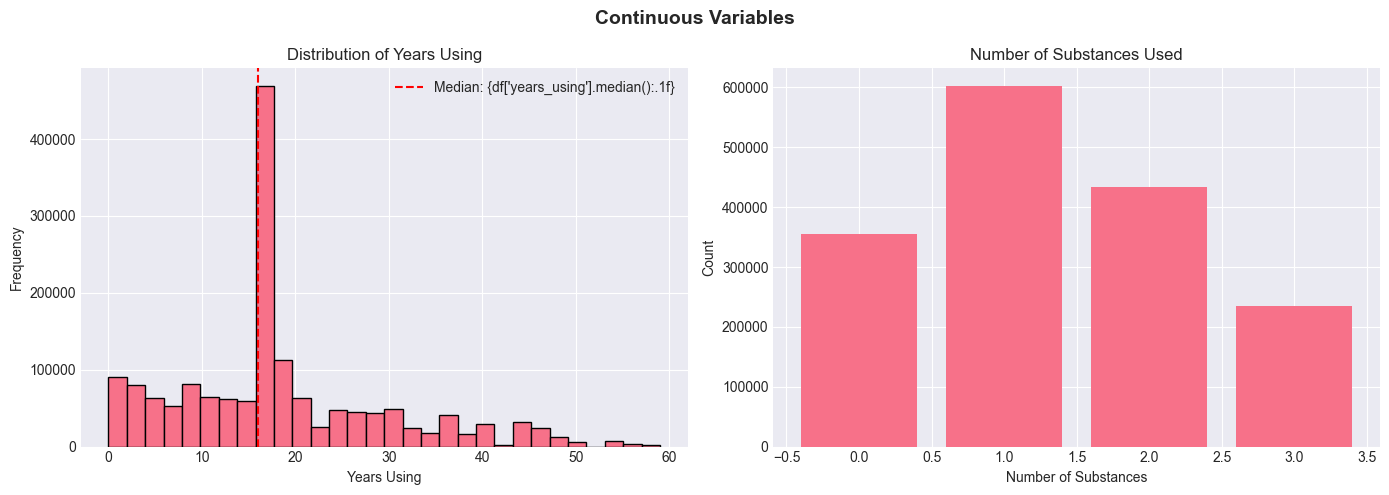

In [8]:
# 6. CONTINUOUS VARIABLES

print("\n" + "=" * 80)
print("6. CONTINUOUS VARIABLES ANALYSIS")
print("=" * 80)

continuous_cols = ["years_using", "number_of_substances"]

for col in continuous_cols:
    if col in df.columns:
        print("\n{col.replace('_', ' ').title()} Statistics:")
        print(df[col].describe())

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

if "years_using" in df.columns:
    axes[0].hist(df["years_using"].dropna(), bins=30, edgecolor="black")
    axes[0].set_xlabel("Years Using")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Distribution of Years Using")
    axes[0].axvline(
        df["years_using"].median(),
        color="red",
        linestyle="--",
        label="Median: {df['years_using'].median():.1f}",
    )
    axes[0].legend()

if "number_of_substances" in df.columns:
    substances = df["number_of_substances"].value_counts().sort_index()
    axes[1].bar(substances.index, substances.values)
    axes[1].set_xlabel("Number of Substances")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Number of Substances Used")

plt.suptitle("Continuous Variables", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [9]:
# 7. CROSS-TABULATIONS (No Statistical Testing)

print("\n" + "=" * 80)
print("7. PATTERN EXPLORATION (CROSS-TABULATIONS)")
print("=" * 80)

# Substance category by service type
if "substance_category" in df.columns and "service_type" in df.columns:
    print("\nSubstance Category × Service Type:")
    crosstab = pd.crosstab(df["substance_category"], df["service_type"])
    print(crosstab)

    # Visualize
    plt.figure(figsize=(12, 6))
    crosstab.plot(kind="bar", stacked=False, ax=plt.gca())
    plt.xlabel("Substance Category")
    plt.ylabel("Count")
    plt.title("Service Type by Substance Category")
    plt.legend(title="Service Type", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(
        "2_exploration/06_substance_by_service.png", dpi=300, bbox_inches="tight"
    )
    plt.close()

# Prior treatments by mental health
if "prior_treatments" in df.columns and "has_mental_health_disorder" in df.columns:
    print("\nPrior Treatments × Mental Health Disorder:")
    crosstab2 = pd.crosstab(df["prior_treatments"], df["has_mental_health_disorder"])
    print(crosstab2)

# Employment by substance category
if "employment_status" in df.columns and "substance_category" in df.columns:
    print("\nEmployment Status × Substance Category:")
    crosstab3 = pd.crosstab(df["employment_status"], df["substance_category"])
    print(crosstab3)


7. PATTERN EXPLORATION (CROSS-TABULATIONS)

Substance Category × Service Type:
service_type        Detox 24hr Hospital  Detox 24hr Residential  \
substance_category                                                
Alcohol                           17964                  104122   
Cannabis                           1439                    2827   
Opioids                            6036                   59058   
Other                                93                    1187   
Sedatives                           801                    3840   
Stimulants                         2669                   28558   

service_type        Intensive Outpatient  Non-intensive Outpatient  \
substance_category                                                   
Alcohol                            56604                    182619   
Cannabis                           15762                     90312   
Opioids                            29182                    187520   
Other                            

In [10]:
# 8. CORRELATION MATRIX FOR BINARY FEATURES

print("\n" + "=" * 80)
print("8. BINARY FEATURE RELATIONSHIPS")
print("=" * 80)

binary_cols = [
    col
    for col in df.columns
    if df[col].dtype in ["int64", "Int64", "int8", "Int8"] and df[col].nunique() <= 2
]

if len(binary_cols) > 1:
    corr_matrix = df[binary_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2",
        cmap="coolwarm",
        center=0,
        square=True,
        linewidths=0.5,
    )
    plt.title("Correlation Matrix: Binary Risk Factors")
    plt.tight_layout()

    # Ensure output directory exists before saving the figure
    out_dir = Path("2_exploration")
    out_dir.mkdir(parents=True, exist_ok=True)
    out_path = out_dir / "07_binary_correlations.png"
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close()

    print("\nSaved correlation heatmap to: {out_path}")

    print("\nTop Positive Correlations (excluding diagonal):")
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            corr_pairs.append(
                {
                    "Feature 1": corr_matrix.columns[i],
                    "Feature 2": corr_matrix.columns[j],
                    "Correlation": corr_matrix.iloc[i, j],
                }
            )

    corr_df = pd.DataFrame(corr_pairs).sort_values("Correlation", ascending=False)
    print(corr_df.head(10))


8. BINARY FEATURE RELATIONSHIPS

Saved correlation heatmap to: {out_path}

Top Positive Correlations (excluding diagonal):
                        Feature 1                     Feature 2  Correlation
15              is_opioid_primary             is_injection_user     0.365976
2                is_polysubstance             is_injection_user     0.235174
0                is_polysubstance             is_opioid_primary     0.212412
1                is_polysubstance          is_stimulant_primary     0.163787
102                   is_homeless                 has_no_income     0.155872
11               is_polysubstance                   is_homeless     0.136929
41              is_injection_user          is_chronic_treatment     0.132093
76           is_chronic_treatment    has_mental_health_disorder     0.128195
50   is_criminal_justice_referral             has_recent_arrest     0.127920
28           is_stimulant_primary  is_criminal_justice_referral     0.118220


In [11]:
# 9. KEY INSIGHTS SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("9. KEY INSIGHTS FOR TREATMENT OPTIMIZATION")
print("=" * 80)

print("\n📊 Population Characteristics:")
if "age_group" in df.columns:
    print("   - Most common age group: {df['age_group'].mode()[0]}")
if "sex" in df.columns:
    print("   - Sex distribution: {df['sex'].value_counts().to_dict()}")

print("\n💊 Substance Use:")
if "substance_category" in df.columns:
    print("   - Top substance category: {df['substance_category'].mode()[0]}")
if "is_polysubstance" in df.columns:
    poly_pct = (df["is_polysubstance"].sum() / len(df) * 100).round(1)
    print("   - Polysubstance use: {poly_pct}%")

print("\n🏥 Treatment Access:")
if "service_type" in df.columns:
    print("   - Most common service: {df['service_type'].mode()[0]}")
if "wait_time_days" in df.columns:
    print("   - Modal wait time: {df['wait_time_days'].mode()[0]}")
if "has_long_wait" in df.columns:
    long_wait_pct = (df["has_long_wait"].sum() / len(df) * 100).round(1)
    print("   - Long wait (15+ days): {long_wait_pct}%")

print("\n⚠️ Risk Factors:")
if "has_mental_health_disorder" in df.columns:
    mh_pct = (df["has_mental_health_disorder"].sum() / len(df) * 100).round(1)
    print("   - Co-occurring mental health: {mh_pct}%")
if "is_chronic_treatment" in df.columns:
    chronic_pct = (df["is_chronic_treatment"].sum() / len(df) * 100).round(1)
    print("   - Chronic treatment seekers: {chronic_pct}%")
if "is_homeless" in df.columns:
    homeless_pct = (df["is_homeless"].sum() / len(df) * 100).round(1)
    print("   - Homeless: {homeless_pct}%")

print("\n✅ Exploration complete! Visualizations saved to 2_exploration/")
print("=" * 80)


9. KEY INSIGHTS FOR TREATMENT OPTIMIZATION

📊 Population Characteristics:
   - Most common age group: {df['age_group'].mode()[0]}
   - Sex distribution: {df['sex'].value_counts().to_dict()}

💊 Substance Use:
   - Top substance category: {df['substance_category'].mode()[0]}
   - Polysubstance use: {poly_pct}%

🏥 Treatment Access:
   - Most common service: {df['service_type'].mode()[0]}
   - Modal wait time: {df['wait_time_days'].mode()[0]}
   - Long wait (15+ days): {long_wait_pct}%

⚠️ Risk Factors:
   - Co-occurring mental health: {mh_pct}%
   - Chronic treatment seekers: {chronic_pct}%
   - Homeless: {homeless_pct}%

✅ Exploration complete! Visualizations saved to 2_exploration/



Raw Counts:
service_type        Detox 24hr Hospital  Detox 24hr Residential  \
substance_category                                                
Alcohol                           17964                  104122   
Cannabis                           1439                    2827   
Opioids                            6036                   59058   
Other                                93                    1187   
Sedatives                           801                    3840   
Stimulants                         2669                   28558   

service_type        Intensive Outpatient  Non-intensive Outpatient  \
substance_category                                                   
Alcohol                            56604                    182619   
Cannabis                           15762                     90312   
Opioids                            29182                    187520   
Other                               1786                      7635   
Sedatives                     

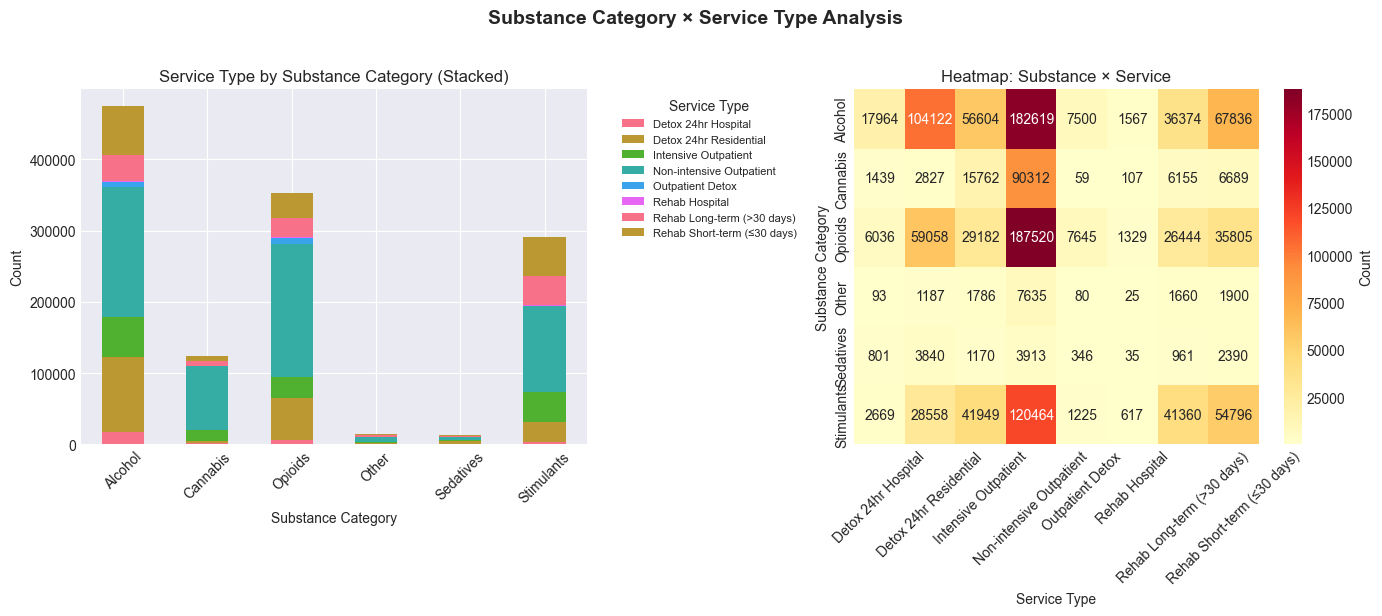

In [12]:
# CORRELATION'S VISUALIZATION
# 1. SUBSTANCE CATEGORY × SERVICE TYPE
if "substance_category" in df.columns and "service_type" in df.columns:
    crosstab1 = pd.crosstab(df["substance_category"], df["service_type"])

    print("\nRaw Counts:")
    print(crosstab1)

    print("\nRow Percentages (% within each substance category):")
    row_pct = (crosstab1.div(crosstab1.sum(axis=1), axis=0) * 100).round(2)
    print(row_pct)

    # Create visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Stacked bar chart
    crosstab1.plot(kind="bar", stacked=True, ax=axes[0])
    axes[0].set_xlabel("Substance Category")
    axes[0].set_ylabel("Count")
    axes[0].set_title("Service Type by Substance Category (Stacked)")
    axes[0].legend(
        title="Service Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8
    )
    axes[0].tick_params(axis="x", rotation=45)

    # Plot 2: Heatmap
    sns.heatmap(
        crosstab1,
        annot=True,
        fmt="d",
        cmap="YlOrRd",
        ax=axes[1],
        cbar_kws={"label": "Count"},
    )
    axes[1].set_xlabel("Service Type")
    axes[1].set_ylabel("Substance Category")
    axes[1].set_title("Heatmap: Substance × Service")
    axes[1].tick_params(axis="x", rotation=45)

    plt.suptitle(
        "Substance Category × Service Type Analysis",
        fontsize=14,
        fontweight="bold",
        y=1.02,
    )
    plt.tight_layout()
    plt.show()


3. EMPLOYMENT STATUS × SUBSTANCE CATEGORY

Raw Counts:
substance_category  Alcohol  Cannabis  Opioids  Other  Sedatives  Stimulants
employment_status                                                           
Full-time            124062     28275    50671   2247       2156       42331
Not in labor force   133646     42228   125092   4910       5387       90637
Part-time             30707     11583    19704    931        723       16956
Unemployed           186171     41264   157552   6278       5190      141714

Row Percentages (% within each employment status):
substance_category  Alcohol  Cannabis  Opioids  Other  Sedatives  Stimulants
employment_status                                                           
Full-time             49.68     11.32    20.29   0.90       0.86       16.95
Not in labor force    33.25     10.51    31.13   1.22       1.34       22.55
Part-time             38.10     14.37    24.45   1.16       0.90       21.04
Unemployed            34.59      7.67    29.2

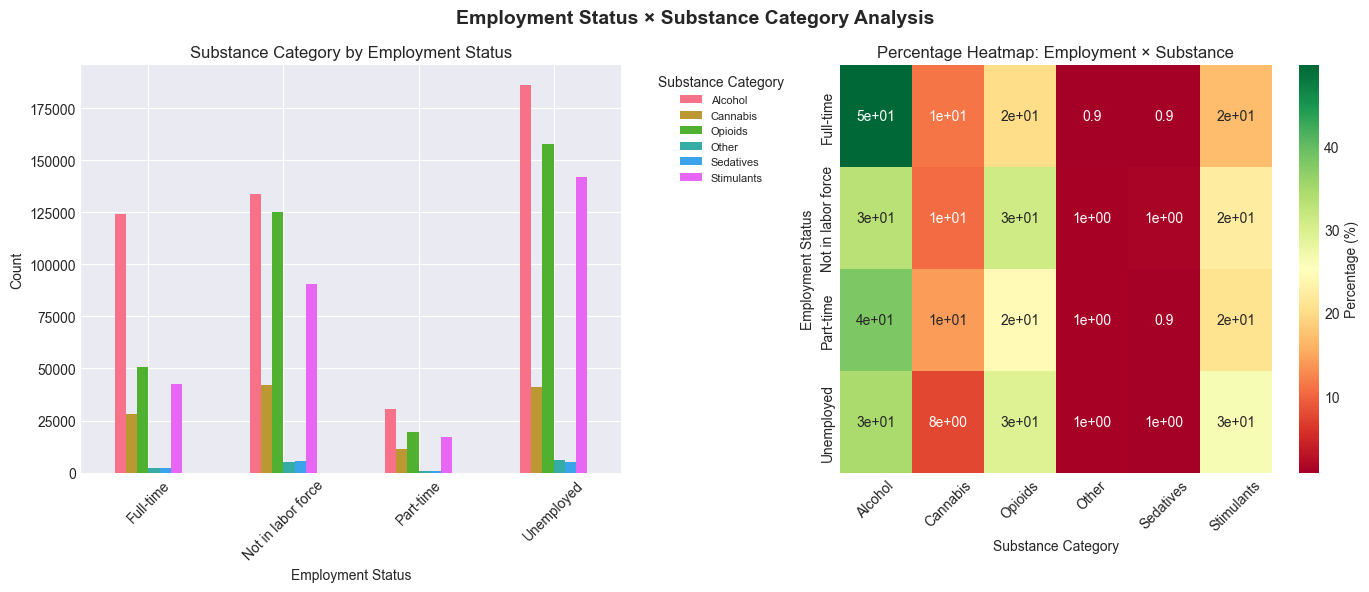

In [13]:
# 2. EMPLOYMENT STATUS × SUBSTANCE CATEGORY
print("\n" + "=" * 80)

print("3. EMPLOYMENT STATUS × SUBSTANCE CATEGORY")
print("=" * 80)

if "employment_status" in df.columns and "substance_category" in df.columns:
    crosstab3 = pd.crosstab(df["employment_status"], df["substance_category"])

    print("\nRaw Counts:")
    print(crosstab3)

    print("\nRow Percentages (% within each employment status):")
    row_pct3 = (crosstab3.div(crosstab3.sum(axis=1), axis=0) * 100).round(2)
    print(row_pct3)

    # Create visualizations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Grouped bar chart
    crosstab3.plot(kind="bar", ax=axes[0])
    axes[0].set_xlabel("Employment Status")
    axes[0].set_ylabel("Count")
    axes[0].set_title("Substance Category by Employment Status")
    axes[0].legend(
        title="Substance Category",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        fontsize=8,
    )
    axes[0].tick_params(axis="x", rotation=45)

    # Plot 2: Percentage heatmap
    sns.heatmap(
        row_pct3,
        annot=True,
        fmt=".1",
        cmap="RdYlGn",
        ax=axes[1],
        cbar_kws={"label": "Percentage (%)"},
    )
    axes[1].set_xlabel("Substance Category")
    axes[1].set_ylabel("Employment Status")
    axes[1].set_title("Percentage Heatmap: Employment × Substance")
    axes[1].tick_params(axis="x", rotation=45)

    plt.suptitle(
        "Employment Status × Substance Category Analysis",
        fontsize=14,
        fontweight="bold",
    )
    plt.tight_layout()
    plt.show()


4. ADDITIONAL CROSS-TABULATIONS

Age Group × Substance Category:
substance_category  Alcohol  Cannabis  Opioids  Other  Sedatives  Stimulants
age_group                                                                   
12-14                   497      5721      143    178         32         106
15-17                  2451     19018     1341    438        245         937
18-20                  6137      9258     5751    487        502        3494
21-24                 21206     15229    17747    979       1105       14183
25-29                 47642     19389    47314   1933       1968       36757
30-34                 68942     17964    74988   2812       2552       54568
35-39                 69982     12995    65880   2651       2266       52409
40-44                 63680      9484    47973   2106       1594       43474
45-49                 49842      5525    28370   1191        880       28368
50-54                 48459      3809    23738    732        673       23416
55-64     

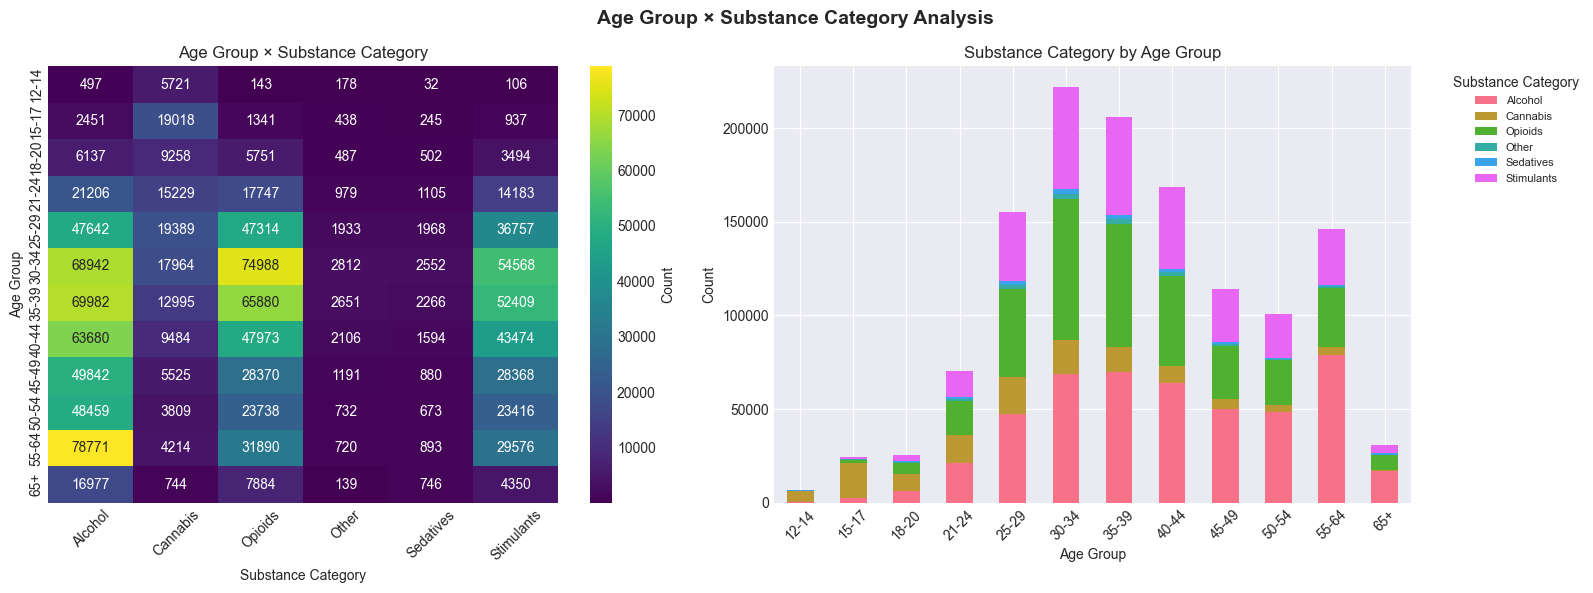


Wait Time × Service Type:
service_type    Detox 24hr Hospital  Detox 24hr Residential  \
wait_time_days                                                
1-7 days                        874                   22517   
15-30 days                       29                    1387   
31+ days                         43                     613   
8-14 days                        56                    2258   
Same day                      32275                  196022   

service_type    Intensive Outpatient  Non-intensive Outpatient  \
wait_time_days                                                   
1-7 days                       13300                     53549   
15-30 days                      2542                     14168   
31+ days                        1890                     11824   
8-14 days                       3482                     17098   
Same day                      174880                    731838   

service_type    Outpatient Detox  Rehab Hospital  Rehab Long-term (>

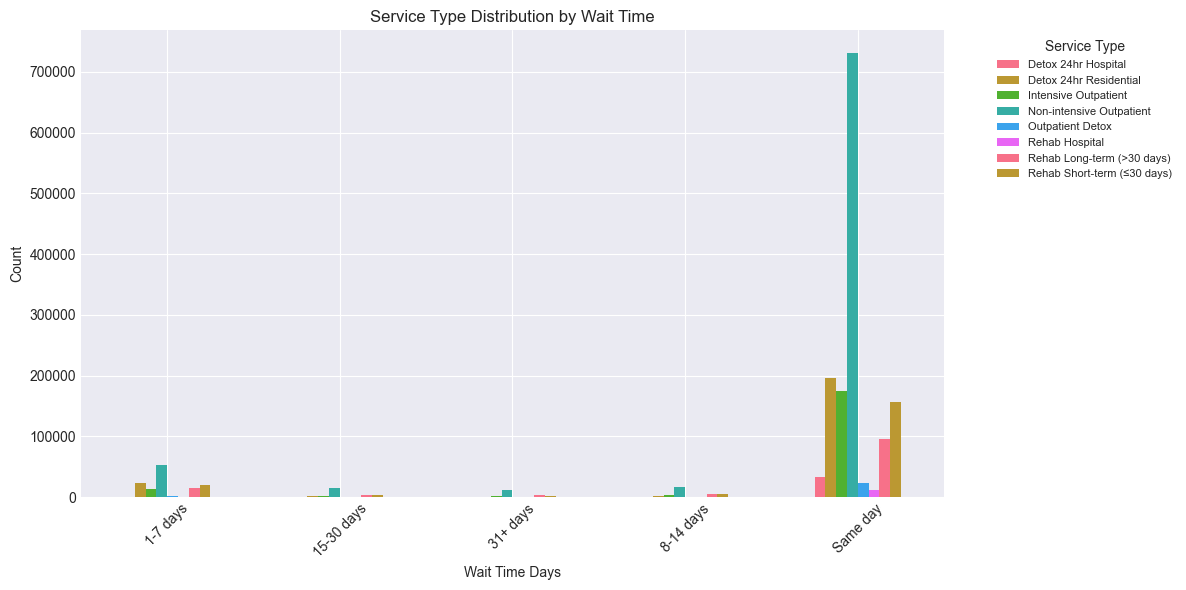


Referral Source × Substance Category:
substance_category        Alcohol  Cannabis  Opioids  Other  Sedatives  \
referral_source                                                          
Alcohol/drug provider       46605      3818    34858   1086       1683   
Criminal justice/DUI/DWI   105088     53898    48382   3374       1736   
Employer/EAP                 2953      1482     1090     32         29   
Other community             38288     14429    20517   1469        932   
Other healthcare            35455      9751    16719    900        906   
School                        455      4271      234    118         19   
Self/Individual            229517     30891   213205   6912       7646   

substance_category        Stimulants  
referral_source                       
Alcohol/drug provider          27520  
Criminal justice/DUI/DWI       85857  
Employer/EAP                    1755  
Other community                29001  
Other healthcare               19463  
School               

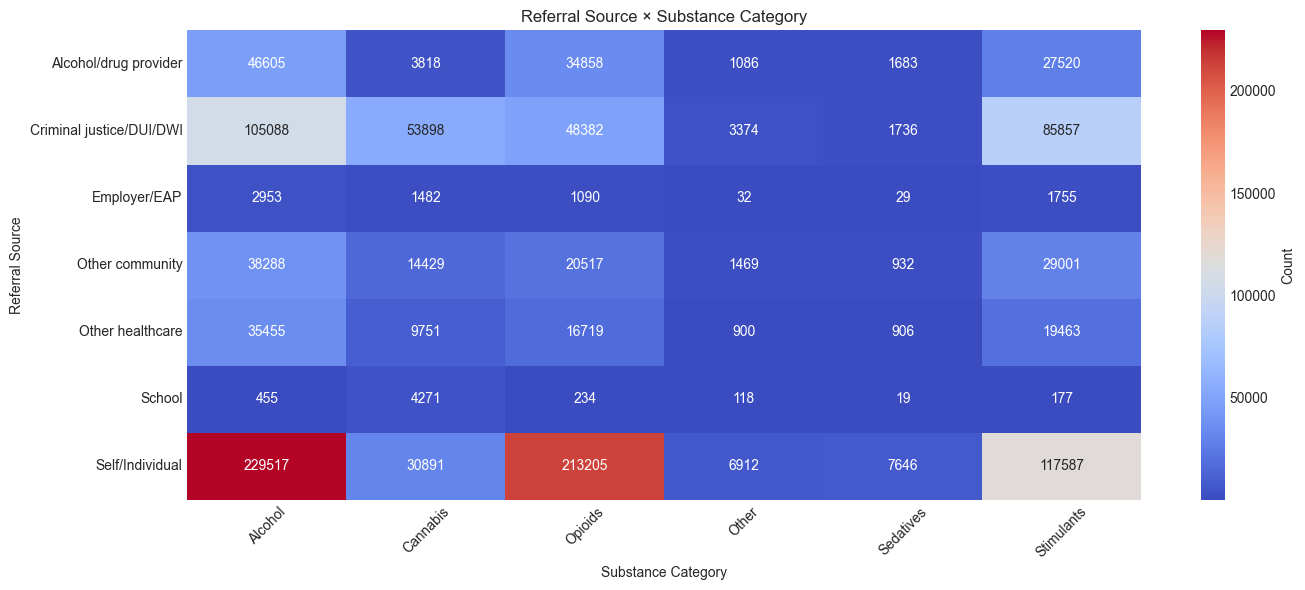

In [14]:
# 3. Age group × Substance category
print("\n" + "=" * 80)
print("4. ADDITIONAL CROSS-TABULATIONS")
print("=" * 80)


if "age_group" in df.columns and "substance_category" in df.columns:
    print("\nAge Group × Substance Category:")
    crosstab4 = pd.crosstab(df["age_group"], df["substance_category"])
    print(crosstab4)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Heatmap
    sns.heatmap(
        crosstab4,
        annot=True,
        fmt="d",
        cmap="viridis",
        ax=axes[0],
        cbar_kws={"label": "Count"},
    )
    axes[0].set_xlabel("Substance Category")
    axes[0].set_ylabel("Age Group")
    axes[0].set_title("Age Group × Substance Category")
    axes[0].tick_params(axis="x", rotation=45)

    # Stacked bar
    crosstab4.plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_xlabel("Age Group")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Substance Category by Age Group")
    axes[1].legend(
        title="Substance Category",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        fontsize=8,
    )
    axes[1].tick_params(axis="x", rotation=45)

    plt.suptitle(
        "Age Group × Substance Category Analysis", fontsize=14, fontweight="bold"
    )
    plt.tight_layout()
    plt.show()

# 4.Wait time × Service type
if "wait_time_days" in df.columns and "service_type" in df.columns:
    print("\nWait Time × Service Type:")
    crosstab5 = pd.crosstab(df["wait_time_days"], df["service_type"])
    print(crosstab5)

    fig, ax = plt.subplots(figsize=(12, 6))
    crosstab5.plot(kind="bar", ax=ax)
    ax.set_xlabel("Wait Time Days")
    ax.set_ylabel("Count")
    ax.set_title("Service Type Distribution by Wait Time")
    ax.legend(
        title="Service Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8
    )
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Referral source × Substance category
if "referral_source" in df.columns and "substance_category" in df.columns:
    print("\nReferral Source × Substance Category:")
    crosstab6 = pd.crosstab(df["referral_source"], df["substance_category"])
    print(crosstab6)

    fig, ax = plt.subplots(figsize=(14, 6))
    sns.heatmap(
        crosstab6,
        annot=True,
        fmt="d",
        cmap="coolwarm",
        ax=ax,
        cbar_kws={"label": "Count"},
    )
    ax.set_xlabel("Substance Category")
    ax.set_ylabel("Referral Source")
    ax.set_title("Referral Source × Substance Category")
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()